In [1]:
from jwst_SNR import jwst_SNRclass
import numpy as np
from nirspec_sn import *
%matplotlib notebook


## Load in test spectrum
Load in a SN Ia spectrum and set it inside a synphot spectrum class

In [15]:
from astropy.io import ascii

file = './data/snia_10pc_phase=p0.95.dat'
data = ascii.read(file)  
df = data.to_pandas()
snia = S.ArraySpectrum(df['Wavelength'].values,df['Flux'].values,waveunits='angstrom',
               fluxunits='flam')
sniaz4 = snia.redshift(4)

## Setup background

In [3]:
from background4jwst import background4jwstclass
background4jwst=background4jwstclass()
    
# set the position for which the background will be calculated. set_position_by_target uses 
# pre-defined positions, set_position can be used to set any position
print(background4jwst.defaulttargets)
background4jwst.set_position_by_target('ElGordo')
# alternatively, background4jwst.set_position('01 02 55.2','-49 14 29.3','ElGordo')
# Get the background from pandeia for this position
# optional parameters: lam, thresh
background4jwst.calc_background()

{'ElGordo': ('01 02 55.2', '-49 14 29.3'), 'EmptyERS': ('03 32 42.397', '-27 42 7.93'), 'NEP-TDF': ('17:22:47.896', '+65:49:21.54'), 'NEP-DF': ('17:40:08.00', '+69:00:08.00'), 'CDF-S': ('03:32:28.0', '−27:48:30')}
Calculating background for position ElGordo (15.730000,-49.241472)


## Calculating exposure times with the main SNR class
This class offers a simplofied quick look into the signal to noise observed by NIRSpec.
In this simple setup, only the prism in the nrsirs2rapid readout mode is avaiable.

In [4]:
# initialise and select instrument
jwst_SNR=jwst_SNRclass(instrument='nirspec')
# assign background
jwst_SNR.set_background4jwst(50,target='EmptyERS')

Initializing pandeia with nirspec, None
Initializing nirspec fixed_slit
Calculating background for position EmptyERS (53.176654,-27.702203)
### Calculating percentile: 50
day: 187


0

If you have a SN Ia at $z=4$, how long of an exposure time would be needed to reach a desired SNR?
We can calculate this quickly with the Imaging_texp_table. In this case we can input a NIRCam filter(s), and
a magnitude range to normalise the spectrum to, and a target SNR. For this simple calculation of the SNR, we take an average over a wavelength range, centered on the $wave$ input and extendts $\pm width$ either side. 

In [5]:
jwst_SNR.verbose=2
jwst_SNR.Imaging_texp_table(['F200W'],np.arange(24.0,30.0,1),5,spec=sniaz4,wave=2,width=.5)
# write the result table to file 
jwst_SNR.texp.write('NIRSpec_SNR4.txt',formatters=jwst_SNR.formatters4texptable)

#############################
#### Filter F200W, mag 24.00 for S/N=5 
#############################
reference spec
Ehu  {'readout_pattern': 'nrsirs2rapid', 'NGROUP': 16, 'NINT': 1, 'tint': 233.4, 'NEXP': 4, 'texp': 992.0}


total texp  992.0445199999999
filter:F200W mag:24.00, target exptime:1000.0  ==> SNR=13.20 exptime=992.0
SNR= 13.20 for starting texp= 992.0
texp guess: 261.1
reference spec
Ehu  {'readout_pattern': 'nrsirs2rapid', 'NGROUP': 4, 'NINT': 1, 'tint': 58.4, 'NEXP': 4, 'texp': 291.8}


total texp  291.77779999999996
filter:F200W mag:24.00, target exptime:291.8  ==> SNR=2.68 exptime=291.8
SNR=  2.68 for next texp= 291.8
SNR=  2.68<5.00 for texp= 291.8, checking the next larger exptime...
reference spec
Ehu  {'readout_pattern': 'nrsirs2rapid', 'NGROUP': 8, 'NINT': 1, 'tint': 116.7, 'NEXP': 4, 'texp': 525.2}


total texp  525.20004
filter:F200W mag:24.00, target exptime:525.2  ==> SNR=6.58 exptime=525.2
SNR=  6.58>=5.00 for texp= 525.2!! SUCCESS!
#############################
#### Filter F200W, mag 25.00 for S/N=5 
#############################
reference spec
Ehu  {'readout_pattern': 'nrsirs2rapid', 'NGROUP': 16, 'NINT': 1, 'tint': 233.4, 'NEXP': 4, 'texp': 992.0}


total texp  992.0445199999999
filter:F200W mag:25.00, target exptime:1000.0  ==> SNR=5.89 exptime=992.0
SNR=  5.89 for starting texp= 992.0
texp guess: 791.7
reference spec
Ehu  {'readout_pattern': 'nrsirs2rapid', 'NGROUP': 16, 'NINT': 1, 'tint': 233.4, 'NEXP': 4, 'texp': 992.0}


total texp  992.0445199999999
filter:F200W mag:25.00, target exptime:992.0  ==> SNR=5.89 exptime=992.0
SNR=  5.89 for next texp= 992.0
SNR=  5.89>5.00 for texp= 992.0, checking the next lower exptime...
BLEH  758.6
reference spec
Ehu  {'readout_pattern': 'nrsirs2rapid', 'NGROUP': 12, 'NINT': 1, 'tint': 175.1, 'NEXP': 4, 'texp': 758.6}


total texp  758.6222799999999
filter:F200W mag:25.00, target exptime:758.6  ==> SNR=4.41 exptime=758.6
SNR=  5.89>=5.00 for texp= 992.0, and SNR=4.41<5.00 for texp= 758.6!! SUCCESS!
#############################
#### Filter F200W, mag 26.00 for S/N=5 
#############################
reference spec
Ehu  {'readout_pattern': 'nrsirs2rapid', 'NGROUP': 16, 'NINT': 1, 'tint': 233.4, 'NEXP': 4, 'texp': 992.0}


total texp  992.0445199999999
filter:F200W mag:26.00, target exptime:1000.0  ==> SNR=2.48 exptime=992.0
SNR=  2.48 for starting texp= 992.0
texp guess: 2605.6
reference spec
Ehu  {'readout_pattern': 'nrsirs2rapid', 'NGROUP': 44, 'NINT': 1, 'tint': 641.9, 'NEXP': 4, 'texp': 2626.0}


total texp  2626.0002
filter:F200W mag:26.00, target exptime:2626.0  ==> SNR=5.57 exptime=2626.0
SNR=  5.57 for next texp=2626.0
SNR=  5.57>5.00 for texp=2626.0, checking the next lower exptime...
BLEH  2392.6
reference spec
Ehu  {'readout_pattern': 'nrsirs2rapid', 'NGROUP': 40, 'NINT': 1, 'tint': 583.6, 'NEXP': 4, 'texp': 2392.6}


total texp  2392.57796
filter:F200W mag:26.00, target exptime:2392.6  ==> SNR=5.23 exptime=2392.6
SNR=  5.23>5.00 for texp=2392.6, checking the next lower exptime...
BLEH  2159.2
reference spec
Ehu  {'readout_pattern': 'nrsirs2rapid', 'NGROUP': 36, 'NINT': 1, 'tint': 525.2, 'NEXP': 4, 'texp': 2159.2}


total texp  2159.1557199999997
filter:F200W mag:26.00, target exptime:2159.2  ==> SNR=4.88 exptime=2159.2
SNR=  5.23>=5.00 for texp=2392.6, and SNR=4.88<5.00 for texp=2159.2!! SUCCESS!
#############################
#### Filter F200W, mag 27.00 for S/N=5 
#############################
reference spec
Ehu  {'readout_pattern': 'nrsirs2rapid', 'NGROUP': 16, 'NINT': 1, 'tint': 233.4, 'NEXP': 4, 'texp': 992.0}


total texp  992.0445199999999
filter:F200W mag:27.00, target exptime:1000.0  ==> SNR=1.01 exptime=992.0
SNR=  1.01 for starting texp= 992.0
texp guess: 8948.2
reference spec
Ehu  {'readout_pattern': 'nrsirs2rapid', 'NGROUP': 80, 'NINT': 2, 'tint': 1167.1, 'NEXP': 4, 'texp': 9395.3}


total texp  9453.60072
filter:F200W mag:27.00, target exptime:9395.3  ==> SNR=4.64 exptime=9453.6
SNR=  4.64 for next texp=9453.6
SNR=  4.64<5.00 for texp=9453.6, checking the next larger exptime...
reference spec
Ehu  {'readout_pattern': 'nrsirs2rapid', 'NGROUP': 84, 'NINT': 2, 'tint': 1225.5, 'NEXP': 4, 'texp': 9862.2}


total texp  9920.4452
filter:F200W mag:27.00, target exptime:9862.2  ==> SNR=4.75 exptime=9920.4
SNR=  4.75<5.00 for texp=9920.4, checking the next larger exptime...
#############################
#### Filter F200W, mag 28.00 for S/N=5 
#############################
reference spec
Ehu  {'readout_pattern': 'nrsirs2rapid', 'NGROUP': 16, 'NINT': 1, 'tint': 233.4, 'NEXP': 4, 'texp': 992.0}


total texp  992.0445199999999
filter:F200W mag:28.00, target exptime:1000.0  ==> SNR=0.41 exptime=992.0
SNR=  0.41 for starting texp= 992.0
texp guess: 31324.2
reference spec
Ehu  {'readout_pattern': 'nrsirs2rapid', 'NGROUP': 84, 'NINT': 2, 'tint': 1225.5, 'NEXP': 4, 'texp': 9862.2}


total texp  9920.4452
filter:F200W mag:28.00, target exptime:9862.2  ==> SNR=1.94 exptime=9920.4
SNR=  1.94 for next texp=9920.4
SNR=  1.94<5.00 for texp=9920.4, checking the next larger exptime...
#############################
#### Filter F200W, mag 29.00 for S/N=5 
#############################
reference spec
Ehu  {'readout_pattern': 'nrsirs2rapid', 'NGROUP': 16, 'NINT': 1, 'tint': 233.4, 'NEXP': 4, 'texp': 992.0}


total texp  992.0445199999999
filter:F200W mag:29.00, target exptime:1000.0  ==> SNR=0.16 exptime=992.0
SNR=  0.16 for starting texp= 992.0
texp guess: 110538.2
reference spec
Ehu  {'readout_pattern': 'nrsirs2rapid', 'NGROUP': 84, 'NINT': 2, 'tint': 1225.5, 'NEXP': 4, 'texp': 9862.2}


total texp  9920.4452
filter:F200W mag:29.00, target exptime:9862.2  ==> SNR=0.78 exptime=9920.4
SNR=  0.78 for next texp=9920.4
SNR=  0.78<5.00 for texp=9920.4, checking the next larger exptime...


0

# Detailed SNR analysis with NIRSpec_SNR
NIRSpec offers a wide variety of observation modes that can significantly change the SNR. Furthermore the Pandeia system produces simulated data for the entire NIRSpec range, which allows us to examine the SNR for all wavelengths and generate random realisations of NIRSpec spectra as observed by JWST through Pandeia. 

NIRSpec_SNR has additional functions that aid in analysing spectra with Pandeia. If the input spectra is normalised to a distance of 10pc the spectrum can be scalled in flux and wavelength by inputing a desired redshift or luminosity distance. We will go through a few examples here.

In [16]:
nspec = NIRSpec_SNR(spec=snia)
# We want a SN Ia at z=, since we input a spectrum normalised to d=10pc we can use the distance scaling
nspec.Distance_scale(z=3)

The SNR can then be calculated by simply inputing an exposure time 

In [17]:
nspec.Calculate_SNR(exptime=10000)

Calculating background for position EmptyERS (53.176654,-27.702203)
### Calculating percentile: 50
day: 187


We can see the SNR and the calculated flux as follows

<IPython.core.display.Javascript object>


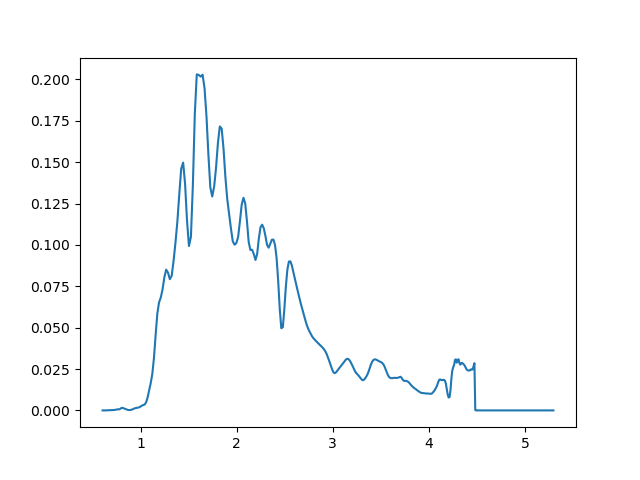

<IPython.core.display.Javascript object>


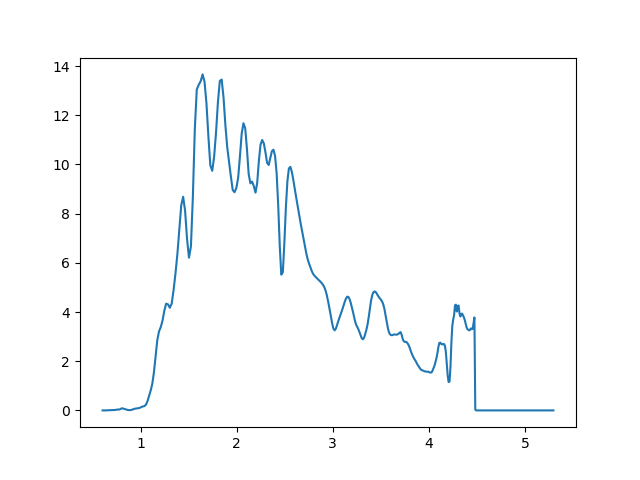

In [18]:
plt.figure()
plt.plot(nspec.calc_wave,nspec.calc_flux)

plt.figure()
plt.plot(nspec.calc_wave,nspec.calc_sn)